In [1]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"Estimated_AA_neh_numbers_combined_1_.csv")
# data=pd.read_csv(r"Estimated_AA_neh_numbers_combined_.csv")
# data=data.dropna()
data=data.sort_values(by="Tritium")
print(data.shape)
data['symbol']=[x.split('(')[1].replace(')','') for x in data.AA_name]
data.head(20)

(20, 10)


,AA_name,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci,APE_MPE_NEH,APE_MPE_ci,symbol
18,Tryptophan (W),0.08,0.024079,0.012585,0.171600,0.245466,0.216575,0.388463,0.119760,0.296110,W
16,Threonine (T),0.20,0.238851,0.245161,0.275754,0.102093,0.088435,0.151194,0.212427,0.116607,T
4,Phenylalanine (F),0.32,0.482867,0.498536,0.543182,0.124452,0.107609,0.198035,0.584002,0.149018,F
19,Tyrosine (Y),0.42,0.688203,0.897945,0.881528,0.137672,0.120227,0.209860,0.850547,0.166312,Y
8,lysine (K),0.54,0.000000,0.000000,0.000000,0.156877,0.137202,0.239189,0.000000,0.186094,K
17,Valine (V),0.56,0.710536,0.590866,0.572299,0.093734,0.079906,0.138318,0.622540,0.107343,V
9,Leucine (L),0.60,0.825890,0.702761,0.714638,0.082703,0.071191,0.130649,0.695529,0.099675,L
7,Isoleucine (I),1.00,0.562614,0.490743,0.516730,0.108127,0.094822,0.164594,0.444713,0.127181,I
10,Methionine (M),1.12,0.890274,0.698417,0.931079,0.157731,0.142965,0.241435,0.932158,0.188506,M
1,Cysteine (C),1.62,1.662064,1.880026,2.104995,0.195283,0.166345,0.269550,2.130349,0.223050,C


In [3]:
# {data.loc[x,'symbol'] :data.loc[x,'Tritium'] for x in range(20)}

In [4]:
data.corr()

,Tritium,Asym_NEH,APE,MPE,Asym_NEH_ci,APE_ci,MPE_ci,APE_MPE_NEH,APE_MPE_ci
Tritium,1.000000,0.871821,0.865027,0.847173,-0.222432,-0.212315,-0.238822,0.850231,-0.220742
Asym_NEH,0.871821,1.000000,0.995936,0.993282,-0.371872,-0.367213,-0.396669,0.994117,-0.368598
APE,0.865027,0.995936,1.000000,0.997388,-0.351396,-0.348747,-0.380571,0.996633,-0.350166
MPE,0.847173,0.993282,0.997388,1.000000,-0.329684,-0.326264,-0.360646,0.997319,-0.328571
Asym_NEH_ci,-0.222432,-0.371872,-0.351396,-0.329684,1.000000,0.998488,0.992854,-0.321690,0.997974
APE_ci,-0.212315,-0.367213,-0.348747,-0.326264,0.998488,1.000000,0.994608,-0.319080,0.998686
MPE_ci,-0.238822,-0.396669,-0.380571,-0.360646,0.992854,0.994608,1.000000,-0.354688,0.996501
APE_MPE_NEH,0.850231,0.994117,0.996633,0.997319,-0.321690,-0.319080,-0.354688,1.000000,-0.320917
APE_MPE_ci,-0.220742,-0.368598,-0.350166,-0.328571,0.997974,0.998686,0.996501,-0.320917,1.000000


In [5]:
Asym_NEH=abs(data.Tritium - data.Asym_NEH)/data.Tritium
print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

APE=abs(data.Tritium - data.APE)/data.Tritium
print('APE',np.median(APE),np.std(APE))

MPE=abs(data.Tritium - data.MPE)/data.Tritium
print('MPE',np.median(MPE),np.std(MPE))

Asym_NEH 0.4027991090105914 0.2479199877138979
APE 0.39783036482912126 0.3035691709898919
MPE 0.391080667021805 0.3307971973880764


In [6]:
# data2=pd.read_csv(r"C:\Workplace\C++\d2ome_restructure\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Debug\Estimated_AA_neh_numbers_utmb-liver_.csv")
# data2=data2.dropna()
# data2=data2.sort_values(by="Tritium")
# print(data2.shape)
# data2['symbol']=[x.split('(')[1].replace(')','') for x in data2.AA_name]
# # data2.head(20)

In [7]:
# data2.corr()

In [8]:
# Asym_NEH=abs(data2.Tritium - data2.Asym_NEH)/data2.Tritium
# print('Asym_NEH',np.median(Asym_NEH),np.std(Asym_NEH))

# APE=abs(data2.Tritium - data2.APE)/data2.Tritium
# print('APE',np.median(APE),np.std(APE))

# MPE=abs(data2.Tritium - data2.MPE)/data2.Tritium
# print('MPE',np.median(MPE),np.std(MPE))

In [9]:
aa_sh_name={'Q':'Gln (Q)','N':'Asn (N)','S':'Ser (S)','G':'Gly (G)','T':'Thr (T)','A':'Ala (A)','D':'Asp (D)','P':'Pro (P)',
            'M':'Met (M)','V':'Val (V)','E':'Glu (E)','H':'His (H)','K':'Lys (K)','L':'Leu (L)','I':'Ile (I)','F':'Phe (F)',
            'C':'Cys (C)','Y':'Tyr (Y)','R':'Arg (R)','W':'Trp (W)',}

In [10]:
def plot_neh_aa(input_data,filename):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.rc('font', size=17) 
    plt.rc('figure', figsize=(18,7)) 
    plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10)
    
    cs=['m','b','g']
    label=['Asymp', 'APE', 'MPE']
    
    label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
    
    
    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        if i ==0: k=-1
        else: k= i
            
        print("============> ",col,"\t")
        plt.errorbar([x+0.3*k for x in range(0,40,2)], input_data[col], input_data[col_ci],
                     fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
#     plt.xticks(range(0,40,2),input_data.AA_name,rotation=90)
    plt.xticks(range(0,40,2),[aa_sh_name[x] for x in input_data.symbol],rotation=90)
    plt.ylabel("Number of exchangeable hydrogens")    
    
    plt.legend()
    plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.show()

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


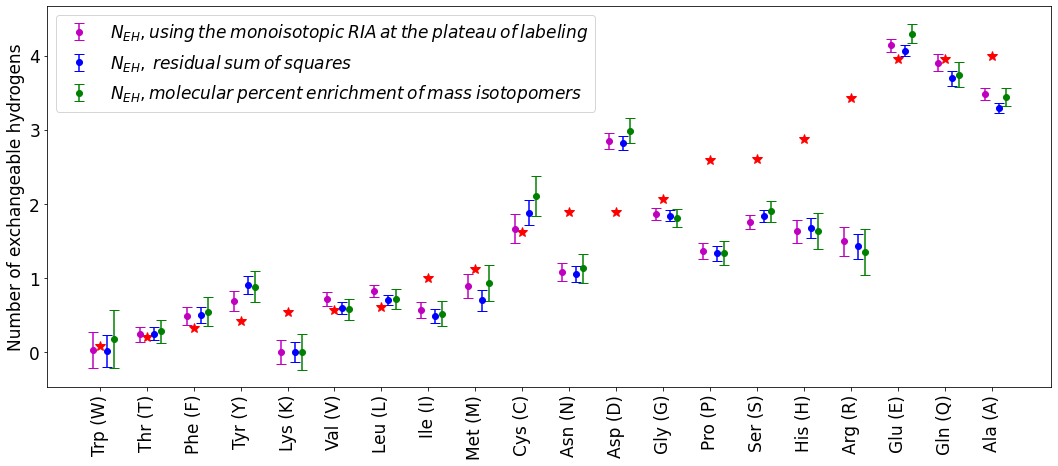

In [11]:
plot_neh_aa(data,'lv')
# plot_neh_aa(data2,'utmb')

============>  Asym_NEH 	
============>  APE 	
============>  MPE 	


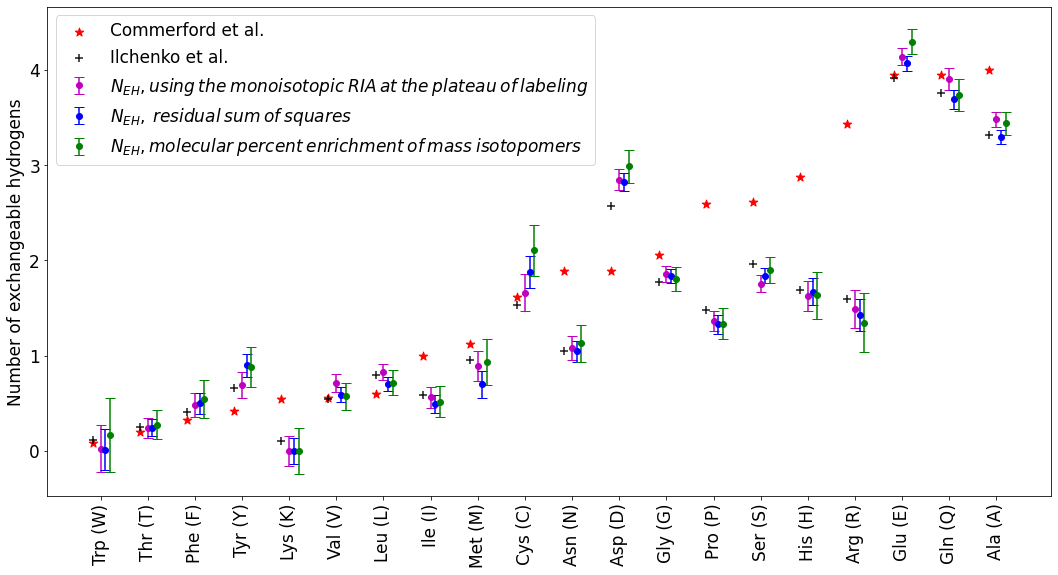

In [12]:
# il={'A':3.41,     'C':1.49,     'D':2.490,     'E':3.58,     'F':0.418,     'G':1.844,    'H':1.372,     'I':0.592,
#      'K':0.121,     'L':0.634,     'M':0.994,     'N':0.674,    'P':0.78,     'Q':3.517,     'R':1.326,     'S':1.574,
#      'T':0.097,    'V':0.591,     'W':0.003,     'Y':0.74}

il={'A':3.316,     'C':1.531,     'D':2.567,     'E':3.91,     'F':0.406,     'G':1.774,    'H':1.687,     'I':0.592,
     'K':0.104,     'L':0.796,     'M':0.95,     'N':1.044,    'P':1.476,     'Q':3.755,     'R':1.59,     'S':1.957,
     'T':0.252,    'V':0.54,     'W':0.113,     'Y':0.655}

ck={'Q':3.67,'N':0.69,'S':1.61,'G':1.34,'T':0.10,'A':4.59,'D':2.55,'P':0.57,'M':1.02,'V':0.78,'E':3.67,
    'H':1.40,'K':0.12,'L':1.30,'I':0.76,'F':0.84,'C':1.53,'Y':0.75,'R':1.36,'W':0.00,}
data["il"]=[il[c] for c in data.symbol]
data["ck"]=[ck[c] for c in data.symbol]

def plot_neh_aa(input_data,filename):
    cols=['Asym_NEH', 'APE', 'MPE']
    col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci']
    plt.rc('font', size=17) 
    plt.rc('figure', figsize=(18,9)) 
#     plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10,label='Commerford et al.')
    
    
    temp_x=[x-0.5 for x in range(0,60,3)]    
    plt.scatter(temp_x, input_data['Tritium'],marker='*',s=80, color="r",label='Commerford et al.')    
    plt.scatter(temp_x, input_data['il'],marker='+',s=80, color="k",alpha=0.9,label='Ilchenko et al.')
#     plt.scatter(temp_x, input_data['ck'],marker='x',s=80, color="k",alpha=0.7,label='Peinado‐Izaguerri, Jorge, et al.')
    
    cs=['m','b','g']
    label=['Asymp', 'APE', 'MPE']
    
    label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
           r"${N_{EH}},\:residual \:sum \:of \:squares$",
            r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$"]
    
    
    for i in range(3):
        col=cols[i]
        col_ci=col_cis[i] 
        k=i
#         if i ==0: k=-1
#         else: k= i
            
        print("============> ",col,"\t")
        plt.errorbar([x+0.3*k for x in range(0,60,3)], input_data[col], input_data[col_ci],
                     fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
#     plt.xticks(range(0,60,3),input_data.AA_name,rotation=90)
    plt.xticks(range(0,60,3),[aa_sh_name[x] for x in input_data.symbol],rotation=90)
    plt.ylabel("Number of exchangeable hydrogens")    
    
    plt.legend()
#     plt.grid()
    plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
    plt.show()
    
plot_neh_aa(data,'lv2')

In [13]:
# sorted(aa_sh_name.values(),key= lambda x: x[1])

In [14]:
sum(data['Tritium'] - data['APE'])

6.672774289581235

In [15]:
def get_stat(col):
    temp=abs(data['Tritium'] - data[col])
    print(col,'\t',np.median(temp),np.std(temp))
get_stat('Asym_NEH')
get_stat('MPE')
get_stat('APE')

Asym_NEH 	 0.24896460560067654 0.5028874115886622
MPE 	 0.47239926150845446 0.5057182420224627
APE 	 0.449763934641487 0.49717612609054435


In [16]:
def get_rd(col):
    temp=data[data.symbol=='D']
    print(abs((float)((temp['Tritium'] - temp[col])/temp['Tritium'])))
get_rd('Asym_NEH')
get_rd('MPE')
get_rd('APE')

0.5070553673846296
0.5801804240865028
0.49398751975553434


In [17]:
il.keys

<function dict.keys>

In [18]:
# # il={'A':3.41,     'C':1.49,     'D':2.490,     'E':3.58,     'F':0.418,     'G':1.844,    'H':1.372,     'I':0.592,
# #      'K':0.121,     'L':0.634,     'M':0.994,     'N':0.674,    'P':0.78,     'Q':3.517,     'R':1.326,     'S':1.574,
# #      'T':0.097,    'V':0.591,     'W':0.003,     'Y':0.74}


# il={'A':3.316,     'C':1.531,     'D':2.567,     'E':3.91,     'F':0.406,     'G':1.774,    'H':1.687,     'I':0.592,
#      'K':0.104,     'L':0.796,     'M':0.95,     'N':1.044,    'P':1.476,     'Q':3.755,     'R':1.59,     'S':1.957,
#      'T':0.252,    'V':0.54,     'W':0.113,     'Y':0.655}

# ck={'Q':3.67,'N':0.69,'S':1.61,'G':1.34,'T':0.10,'A':4.59,'D':2.55,'P':0.57,'M':1.02,'V':0.78,'E':3.67,
#     'H':1.40,'K':0.12,'L':1.30,'I':0.76,'F':0.84,'C':1.53,'Y':0.75,'R':1.36,'W':0.00,}
# data["il"]=[il[c] for c in data.symbol]
# data["ck"]=[ck[c] for c in data.symbol]

# def plot_neh_aa(input_data,filename):
#     cols=['Asym_NEH', 'APE', 'MPE','APE_MPE_NEH']
#     col_cis=['Asym_NEH_ci', 'APE_ci','MPE_ci','APE_MPE_ci']
#     plt.rc('font', size=17) 
#     plt.rc('figure', figsize=(18,9)) 
# #     plt.errorbar(range(0,40,2), input_data['Tritium'], [0]*20,fmt ='*',mfc='r',color="r",ms=10,label='Commerford et al.')
    
    
#     temp_x=[x-0.5 for x in range(0,60,3)]    
#     plt.scatter(temp_x, input_data['Tritium'],marker='*',s=80, color="r",label='Commerford et al.')    
#     plt.scatter(temp_x, input_data['il'],marker='+',s=80, color="k",alpha=0.9,label='Ilchenko et al.')
# #     plt.scatter(temp_x, input_data['ck'],marker='x',s=80, color="k",alpha=0.7,label='Peinado‐Izaguerri, Jorge, et al.')
    
#     cs=['m','b','g','orange']
#     label=['Asymp', 'APE', 'MPE','APE_MPE']
    
#     label=[r"${N_{EH}},using\: the\: monoisotopic\: RIA\: at\: the\: plateau\: of\: labeling$",
#            r"${N_{EH}},\:residual \:sum \:of \:squares$",
#             r"${N_{EH}},molecular\:percent\:enrichment\:of\:mass\:isotopomers$",
#           'Ilchenko et al. -> new']
    
    
#     for i in range(4):
#         col=cols[i]
#         col_ci=col_cis[i] 
#         k=i
# #         if i ==0: k=-1
# #         else: k= i
            
#         print("============> ",col,"\t")
#         plt.errorbar([x+0.3*k for x in range(0,60,3)], input_data[col], input_data[col_ci],
#                      fmt ='o',mfc=cs[i],color=cs[i],ms=6,label=label[i],capsize=5)
    
# #     plt.xticks(range(0,60,3),input_data.AA_name,rotation=90)
#     plt.xticks(range(0,60,3),[aa_sh_name[x] for x in input_data.symbol],rotation=90)
#     plt.ylabel("Number of exchangeable hydrogens")    
    
#     plt.legend()
# #     plt.grid()
#     plt.savefig(filename+"_CI.jpeg",dpi=900,bbox_inches='tight')
#     plt.show()
    
# plot_neh_aa(data,'lv2')